# Import Libraries

In [291]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Spesific to Clustering
from sklearn.cluster import KMeans
import folium

from tqdm import tqdm # makes your loops show a progess bar

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

from collections import defaultdict

# import hdbscan # HDBSCAN is not available in sklearn.
import folium # Used for plotting geo-spatial data on a map.


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
!pip install category_encoders
from category_encoders import MEstimateEncoder

#classification
from scipy.stats import skew
from scipy.stats import boxcox

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Read the dataset

In [292]:
data = pd.read_csv("/content/sample_data/NY-House-Dataset.csv")
df = pd.DataFrame(data)

# Refer the information about dataset

**View information of the CSV data**

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [294]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


**View datatypes**

In [295]:
df.dtypes

BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

**View the first 10 rows of the CSV file**

In [296]:
df.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.000000,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.000000,33000.000000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.000000,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1.000000,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694


**shape of the data**

In [297]:
df.shape

(4801, 17)

**Boxplot of all data**

<Axes: >

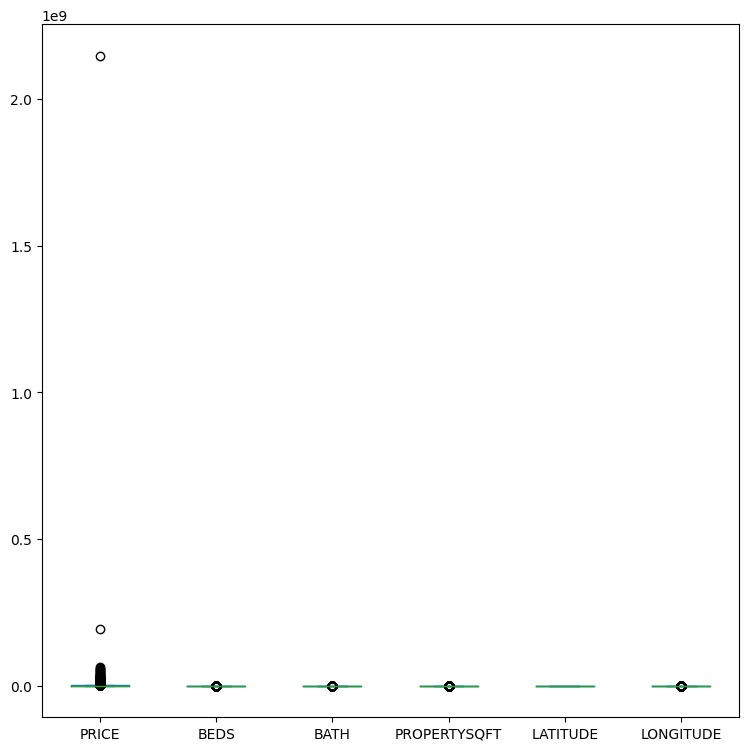

In [298]:
data.plot(kind="box", figsize=(9,9))

**Data Correlation**

In [299]:
df[['PRICE','BEDS','PROPERTYSQFT','LATITUDE','LONGITUDE']].corr()

,PRICE,BEDS,PROPERTYSQFT,LATITUDE,LONGITUDE
PRICE,1.000000,0.052189,0.110889,-0.020392,-0.054273
BEDS,0.052189,1.000000,0.420503,-0.060933,-0.004529
PROPERTYSQFT,0.110889,0.420503,1.000000,0.023413,-0.037308
LATITUDE,-0.020392,-0.060933,0.023413,1.000000,0.513969
LONGITUDE,-0.054273,-0.004529,-0.037308,0.513969,1.000000


**Correlation heatmap**

<Axes: >

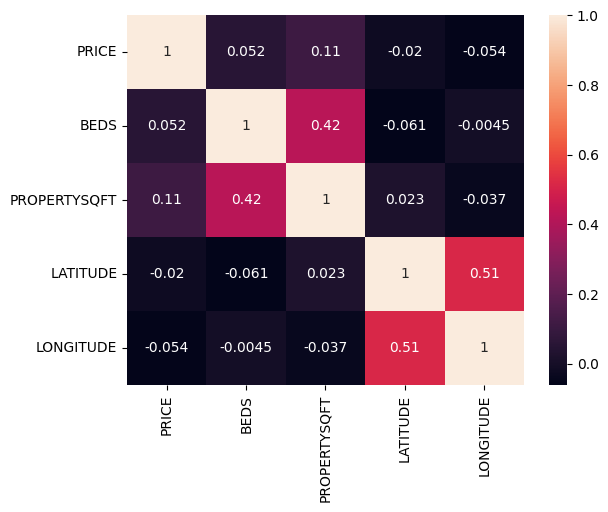

In [300]:
sns.heatmap(data[['PRICE','BEDS','PROPERTYSQFT','LATITUDE','LONGITUDE']].corr(),annot=True)

###Information exploring related to classification of the dataset

<Axes: >

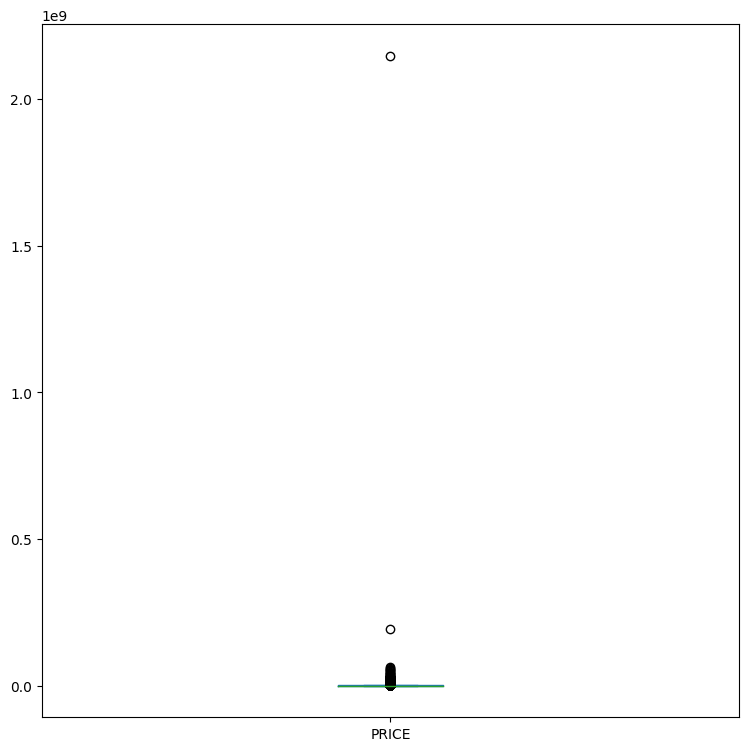

In [301]:
data['PRICE'].plot(kind="box", figsize=(9,9))

<Axes: >

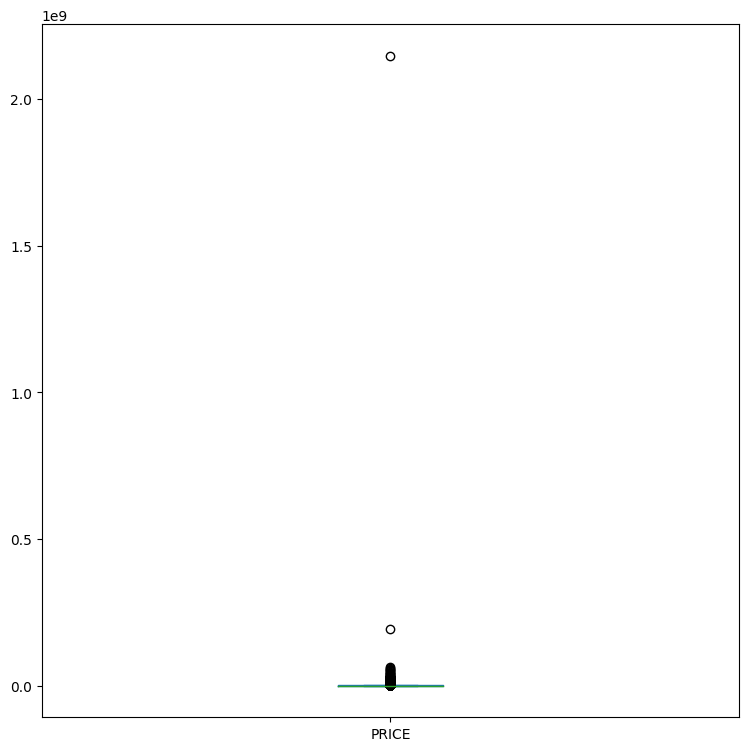

In [302]:
data['PRICE'].plot(kind="box", figsize=(9,9))

<Axes: >

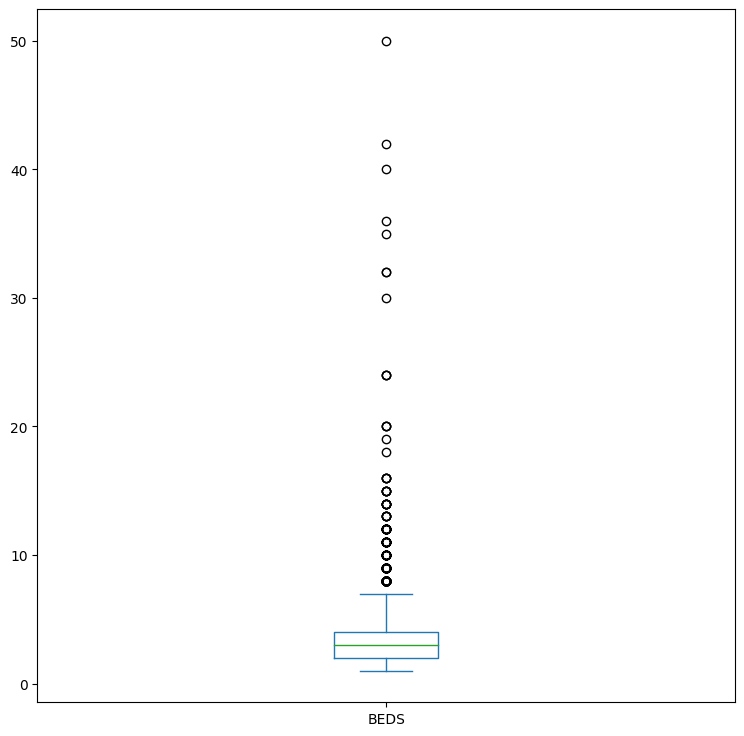

In [303]:
data['BEDS'].plot(kind="box", figsize=(9,9))

<Axes: ylabel='Frequency'>

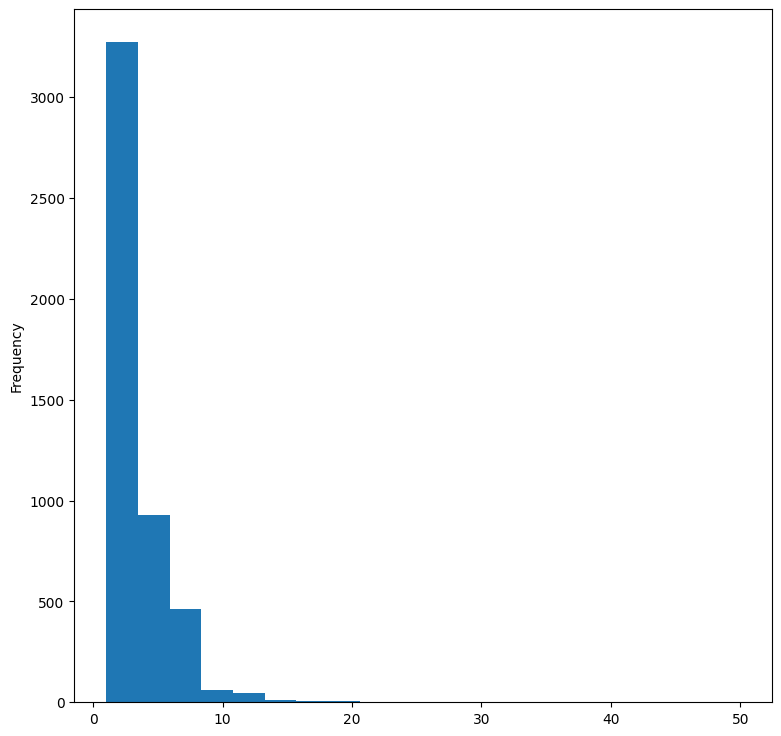

In [304]:
data['BEDS'].plot(kind = "hist", figsize=(9,9),bins=20)

In [305]:
from scipy.stats import skew
print(skew(data['BEDS']))

5.447439265773591


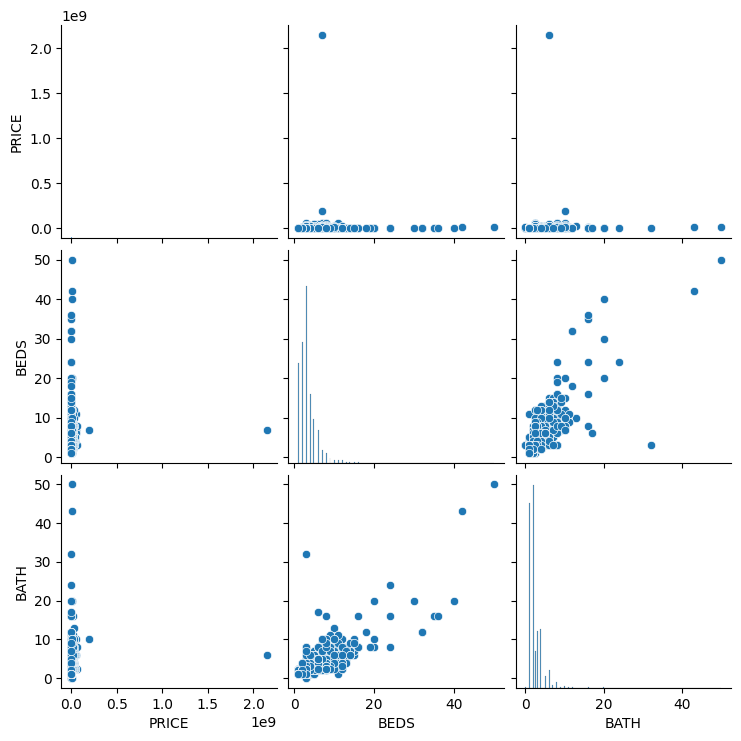

In [306]:
# Data Exploration
sns.pairplot(data[['PRICE', 'BEDS', 'BATH']])
plt.show()

In [307]:
np.random.seed(0)
num_samples = len(data)
print(data['PRICE'].min())

2494


###Information exploring related to Longidude and Latitude of the dataset

#### Descriptive analysis

##### **Latitude**

**Data of Latitude**

In [308]:
data['LATITUDE']

0       40.761255
1       40.766393
2       40.541805
3       40.761398
4       40.767224
          ...    
4796    40.774350
4797    40.732538
4798    40.745882
4799    40.742770
4800    40.579147
Name: LATITUDE, Length: 4801, dtype: float64

In [309]:
# min of latitude
min(data['LATITUDE'])

40.4995462

**Boxplot for Latitude**

<Axes: >

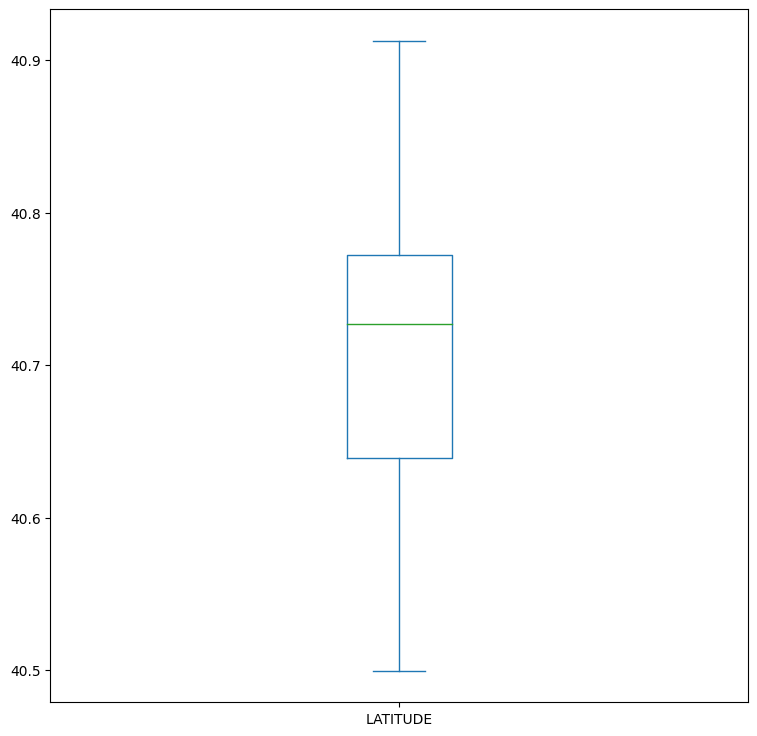

In [310]:
data["LATITUDE"].plot(kind="box", figsize=(9,9))

**variance of the latitude**

In [311]:
va=statistics.variance(data['LATITUDE'])
print(va)

0.007687005062299884


**25th and 75th percentiles of latitude**

In [312]:
q1=np.percentile(data['LATITUDE'],25)
print(q1)
q3=np.percentile(data['LATITUDE'],75)
print(q3)

40.6393755
40.7719231


**Check skewness of latitude**

In [313]:
from scipy.stats import skew
print(skew(data['LATITUDE']))

-0.08837552707208973


<ipython-input-314-f1a9bb12f9b0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(data["LATITUDE"],label="Skewness: %.2f"%(data["LATITUDE"].skew()) )


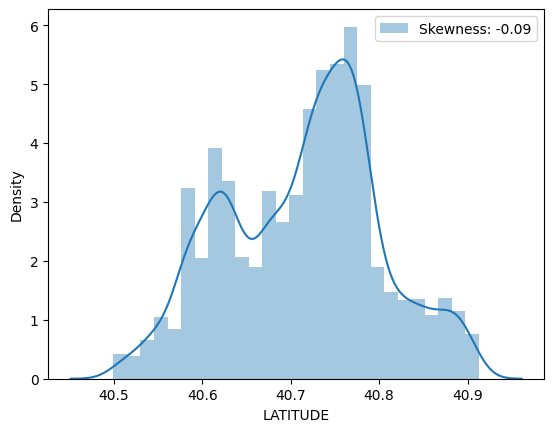

In [314]:
data["LATITUDE"].fillna(data["LATITUDE"].median(),inplace=True)
t=sns.distplot(data["LATITUDE"],label="Skewness: %.2f"%(data["LATITUDE"].skew()) )
t.legend()

**Plotting Latitude data**

<Axes: ylabel='Frequency'>

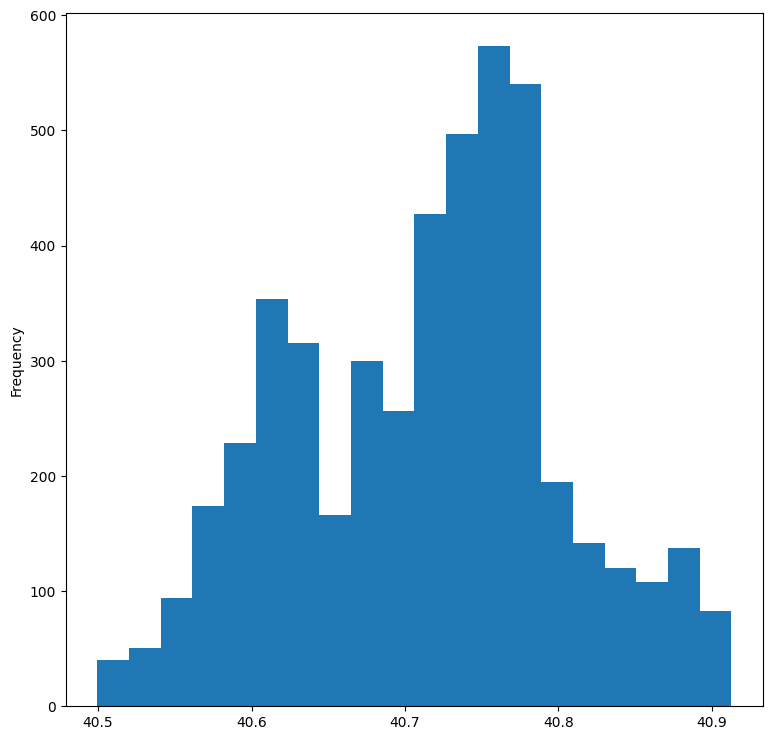

In [315]:
data["LATITUDE"].plot(kind="hist", figsize=(9,9),bins=20)

**Boxplot for latitude**

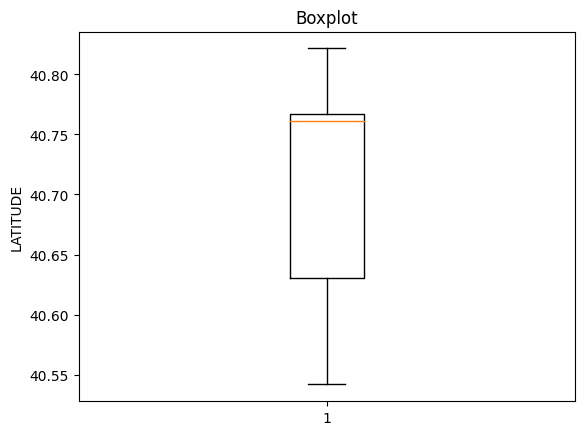

In [316]:
plt.boxplot(df['LATITUDE'].head(10))
plt.title('Boxplot')
plt.ylabel('LATITUDE')
plt.show()

**Displot for latitude**

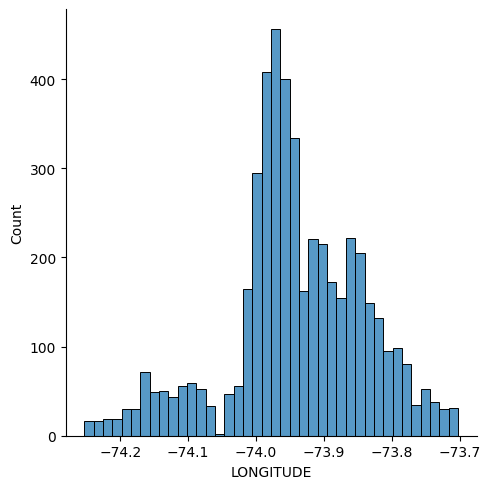

In [317]:
sns.displot(data['LONGITUDE'])

##### **Logitude**

**Data of Longitude**

In [318]:
data['LONGITUDE']

0      -73.974483
1      -73.980991
2      -74.196109
3      -73.974613
4      -73.969856
          ...    
4796   -73.955879
4797   -73.860152
4798   -74.003398
4799   -73.872752
4800   -73.970949
Name: LONGITUDE, Length: 4801, dtype: float64

In [319]:
# min of latitude
min(data['LONGITUDE'])

-74.2530332

**Boxplot for Longitude**

<Axes: >

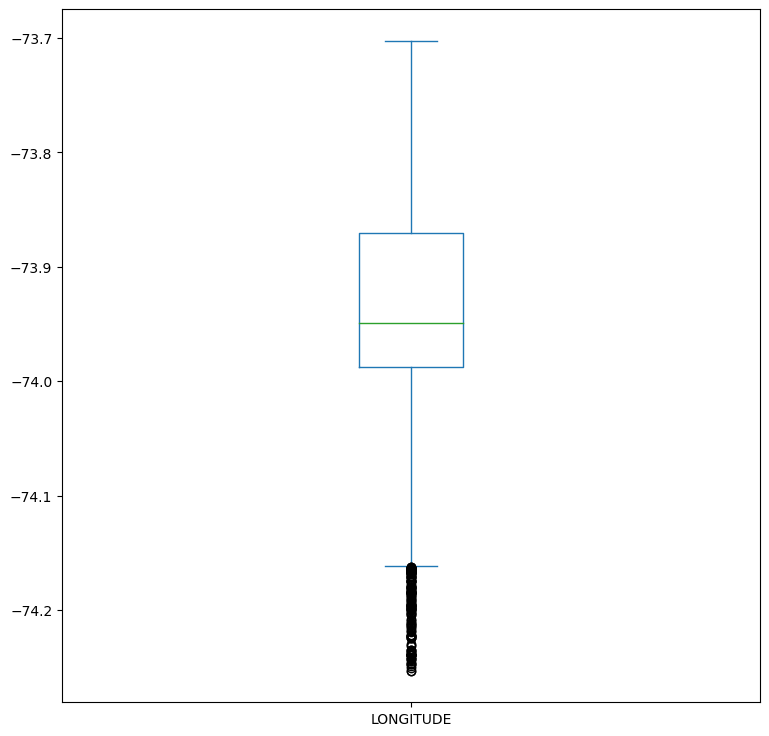

In [320]:
data["LONGITUDE"].plot(kind="box", figsize=(9,9))

**variance of the Longitude**

In [321]:
sd=statistics.stdev(data['LONGITUDE'])
print(sd)

0.10108248150173903


**25th and 75th percentiles of Longitude**

In [322]:
q1=np.percentile(data['LONGITUDE'],25)
print(q1)
q3=np.percentile(data['LONGITUDE'],75)
print(q3)

-73.9871434
-73.8706379


**Check skewness of Longitude**

In [323]:
from scipy.stats import skew
print(skew(data['LONGITUDE']))

-0.3944309338520721


<ipython-input-324-9097ffe6b8d3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(data["LONGITUDE"],label="Skewness: %.2f"%(data["LONGITUDE"].skew()) )


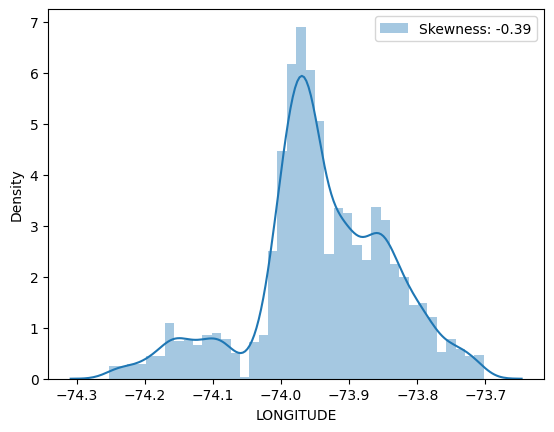

In [324]:
data["LONGITUDE"].fillna(data["LONGITUDE"].median(),inplace=True)
t=sns.distplot(data["LONGITUDE"],label="Skewness: %.2f"%(data["LONGITUDE"].skew()) )
t.legend()

**Plotting Longitude data**

<Axes: ylabel='Frequency'>

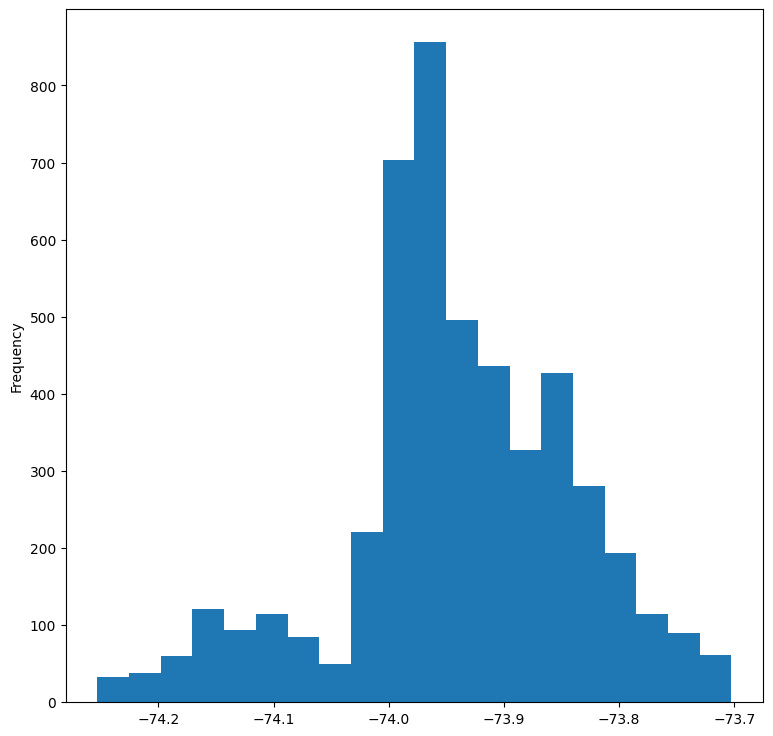

In [325]:
data["LONGITUDE"].plot(kind="hist", figsize=(9,9),bins=20)

**Boxplot for Longitude**

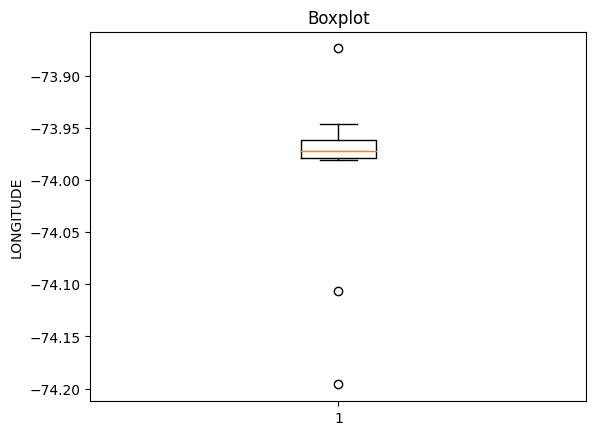

In [326]:
plt.boxplot(df['LONGITUDE'].head(10))
plt.title('Boxplot')
plt.ylabel('LONGITUDE')
plt.show()

**Displot for Longitude**

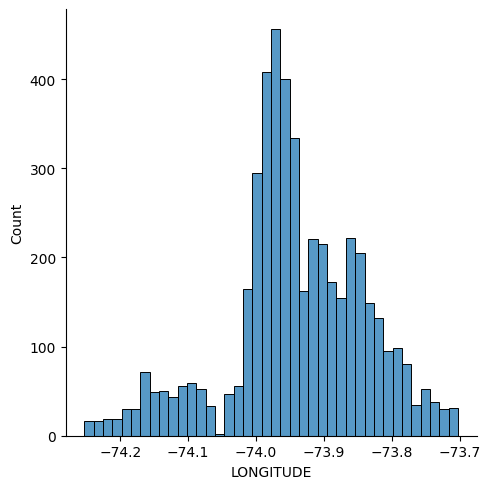

In [327]:
sns.displot(data['LONGITUDE'])

# Preprocessing

## Cleaning

**Null or missing values**

In [328]:
data.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

**Handle duplicate values**

In [329]:
# view duplicate values
data.duplicated().sum()

214

In [330]:
#remove duplicate values
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [331]:
# Calculate the skewness of the data
skewness = data['BATH'].skew()

# Print the skewness value
print("Skewness of the dataset:", skewness)

# If skewness is positive, apply log transformation to make the data more symmetric
if skewness > 0:
    transformed_data = np.log1p(data['BATH'])  # Log transformation
    # Replace the skewed column with the transformed data
    data['BATH'] = transformed_data

# Print the updated skewness after transformation
print("Skewness after transformation:", data['BATH'].skew())

Skewness of the dataset: 7.829052433825595
Skewness after transformation: 1.0257202573740452


In [332]:
# Calculate the skewness of the beds
skewness = data['BEDS'].skew()

# Print the skewness value
print("Skewness of the dataset:", skewness)

# If skewness is positive, apply log transformation to make the data more symmetric
if skewness > 0:
    transformed_data = np.log1p(data['BEDS'])  # Log transformation
    # Replace the skewed column with the transformed data
    data['BEDS'] = transformed_data

# Print the updated skewness after transformation
print("Skewness after transformation:", data['BEDS'].skew())

Skewness of the dataset: 5.495813321650833
Skewness after transformation: 0.5555997013122073


In [333]:
# Calculate the skewness of the data
skewness = data['PRICE'].skew()

# Print the skewness value
print("Skewness of the dataset:", skewness)

# If skewness is positive, apply log transformation to make the data more symmetric
if skewness > 0:
    transformed_data = np.log1p(data['PRICE'])  # Log transformation
    # Replace the skewed column with the transformed data
    data['PRICE'] = transformed_data

# Print the updated skewness after transformation
print("Skewness after transformation:", data['PRICE'].skew())

Skewness of the dataset: 65.35481192348358
Skewness after transformation: 0.8178380049519163


In [334]:
initial_skewness = data['PRICE'].skew()
print("Initial skewness of the dataset:", initial_skewness)

# If initial skewness is positive, apply log transformation
if initial_skewness > 0:
    data['PRICE'] = np.log1p(data['PRICE'])  # Log transformation

# Calculate the new skewness after transformation
new_skewness = data['PRICE'].skew()
print("Skewness after transformation:", new_skewness)

# Check if the new skewness is within the desired range
if -0.5 <= new_skewness <= 0.5:
    print("The skewness is now within the acceptable range.")
else:
    print("The skewness is still outside the acceptable range.")

Initial skewness of the dataset: 0.8178380049519163
Skewness after transformation: 0.41905694581536096
The skewness is now within the acceptable range.


## Integration

## Reduction

## Transformation

In [335]:
#convert data type float in to int
data['BATH']=data['BATH'].astype(int)
data['BEDS']=data['BEDS'].astype(int)

# Data Mining

## Association Related data mining

### Descriptive Analysis

In [336]:
data['BATH']

0       1
1       2
2       1
3       0
4       1
       ..
4796    0
4797    0
4798    0
4799    0
4800    0
Name: BATH, Length: 4587, dtype: int64

In [337]:
mean=statistics.mean(data['BATH'])

In [338]:
print(round(mean,2))

0.71


In [339]:
print(mean)
median=statistics.median(data['BATH'])
print(median)

0.7072160453455417
1


In [340]:
sd=statistics.stdev(data['BATH'])
print(sd)

0.5102078685216538


In [341]:
va=statistics.variance(data['BATH'])
print(va)

0.2603120691014092


In [342]:
q1=np.percentile(data['BATH'],25)
print(q1)
q3=np.percentile(data['BATH'],75)
print(q3)

0.0
1.0


In [343]:
df=pd.DataFrame(data)
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,2.614496,1,1,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,3.000148,2,2,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,2.600349,1,1,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,2.496660,1,0,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,2.935071,2,1,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [344]:
df[['PRICE','BEDS','BATH','MAIN_ADDRESS']].head(10)

,PRICE,BEDS,BATH,MAIN_ADDRESS
0,2.614496,1,1,"2 E 55th St Unit 803New York, NY 10022"
1,3.000148,2,2,Central Park Tower Penthouse-217 W 57th New Yo...
2,2.600349,1,1,"620 Sinclair AveStaten Island, NY 10312"
3,2.496660,1,0,"2 E 55th St Unit 908W33Manhattan, NY 10022"
4,2.935071,2,1,"5 E 64th StNew York, NY 10065"
5,2.670310,1,1,"584 Park PlBrooklyn, NY 11238"
6,2.688500,1,1,"157 W 126th St Unit 1BNew York, NY 10027"
7,2.869993,2,2,"177 Benedict RdStaten Island, NY 10304"
8,2.601763,0,0,"875 Morrison Ave Apt 3MBronx, NY 10473"
9,2.638667,1,0,"1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230"


Find out the skewness

In [345]:
from scipy.stats import skew
print(skew(data['BATH']))

-0.22545589557514328


<Axes: >

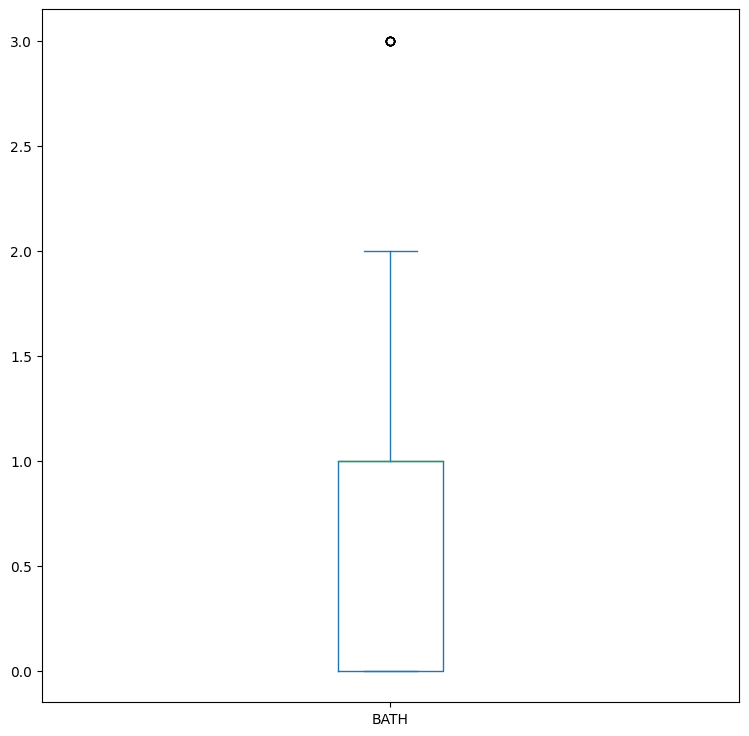

In [346]:
data['BATH'].plot(kind="box", figsize=(9,9))

<Axes: >

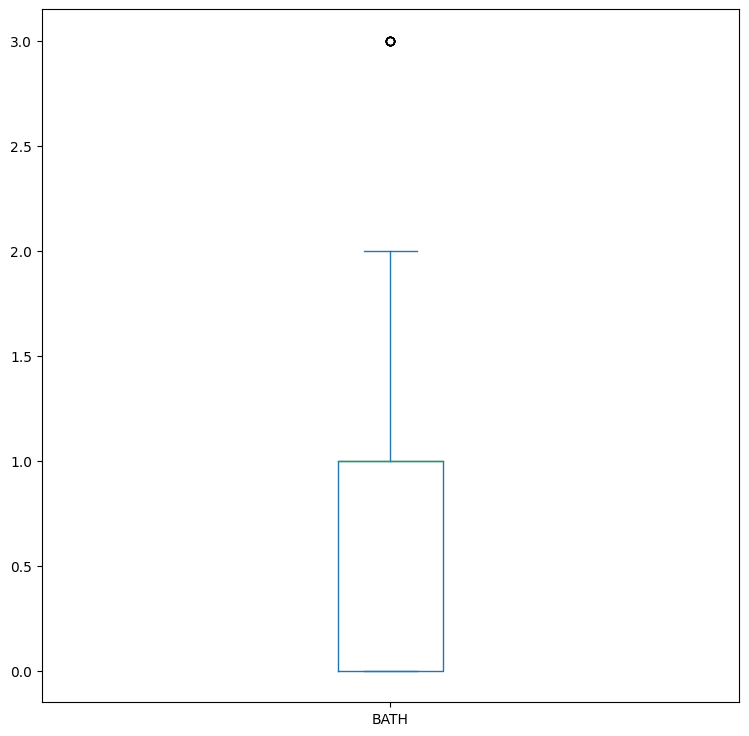

In [347]:
data['BATH'].plot(kind="box", figsize=(9,9))

<Axes: ylabel='Frequency'>

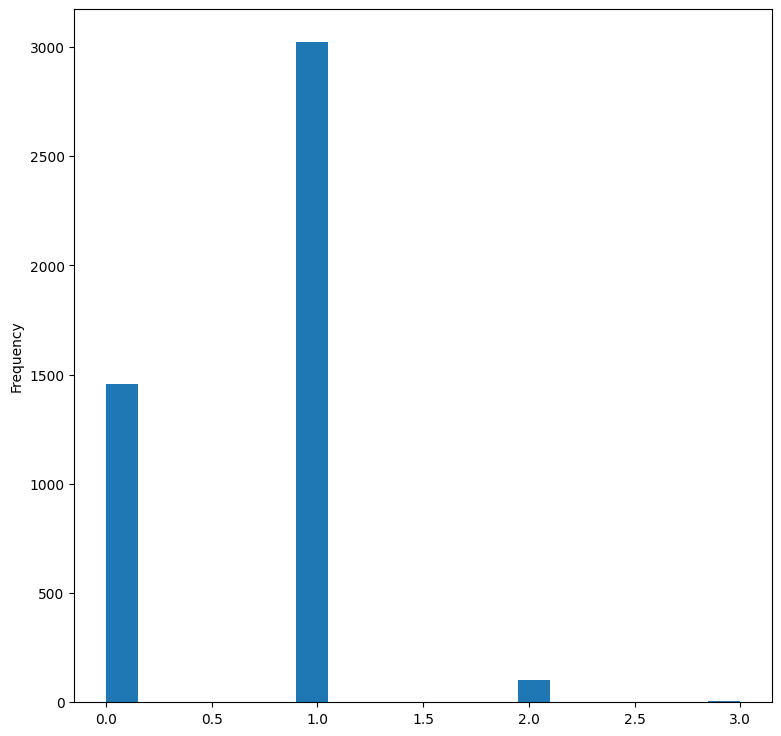

In [348]:
data["BATH"].plot(kind="hist", figsize=(9,9), bins=20)

In [349]:

#Data for bath
data['BATH']

0       1
1       2
2       1
3       0
4       1
       ..
4796    0
4797    0
4798    0
4799    0
4800    0
Name: BATH, Length: 4587, dtype: int64

In [350]:
min(data['BATH'])

0

<Axes: >

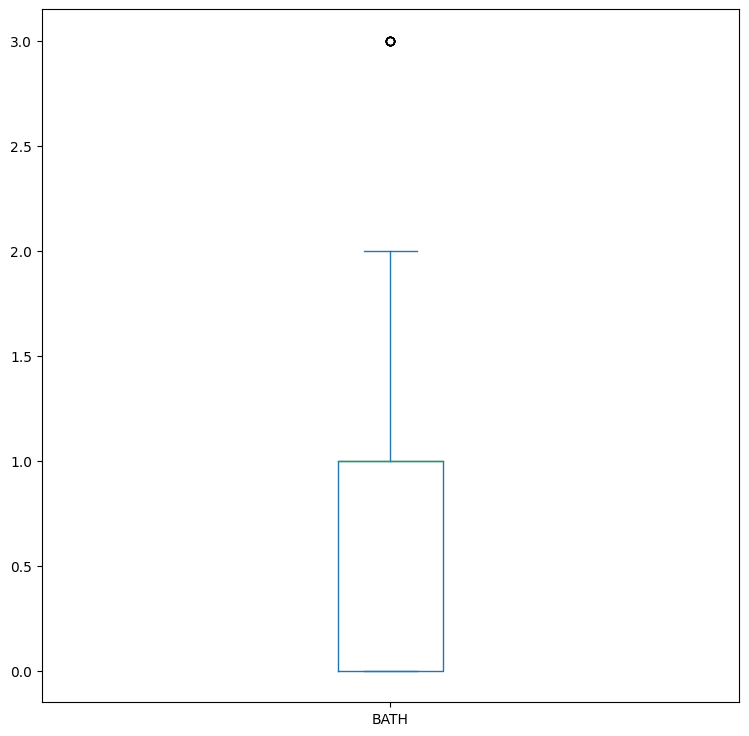

In [351]:
#Boxplot for bath
data["BATH"].plot(kind="box", figsize=(9,9))

In [352]:
#variance of the bath
va=statistics.variance(data['BATH'])
print(va)

0.2603120691014092


In [353]:
#25 and 75 percentiles of bath
q1=np.percentile(data['BATH'],25)
print(q1)
q3=np.percentile(data['BATH'],75)
print(q3)

0.0
1.0


In [354]:
# Check the skeweness of bath
from scipy.stats import skew
print(skew(data['BATH']))

-0.22545589557514328


<ipython-input-355-24909cc7d6d0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  t=sns.distplot(data["BATH"],label="Skewness: %.2f"%(data["BATH"].skew()) )


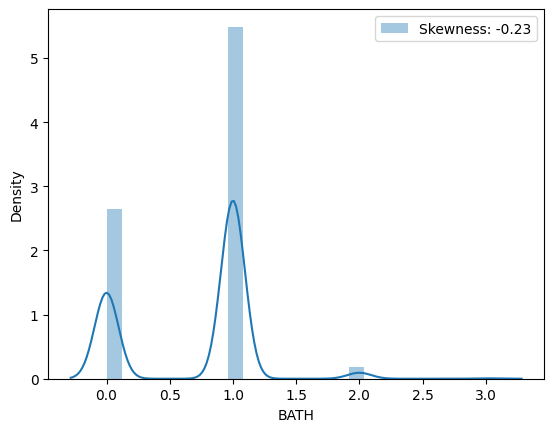

In [355]:
#skewness
data["BATH"].fillna(data["BATH"].median(),inplace=True)
t=sns.distplot(data["BATH"],label="Skewness: %.2f"%(data["BATH"].skew()) )
t.legend()

In [356]:
data.dtypes

BROKERTITLE                     object
TYPE                            object
PRICE                          float64
BEDS                             int64
BATH                             int64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

In [357]:
data['BEDS']

0       1
1       2
2       1
3       1
4       2
       ..
4796    0
4797    0
4798    0
4799    1
4800    0
Name: BEDS, Length: 4587, dtype: int64

In [358]:
print(data.describe())

             PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4587.000000  4587.000000  4587.000000   4587.000000  4587.000000   
mean      2.688509     0.902551     0.707216   2177.712426    40.713932   
std       0.068694     0.488739     0.510208   2283.095559     0.087738   
min       2.177254     0.000000     0.000000    230.000000    40.499546   
25%       2.647618     1.000000     0.000000   1200.000000    40.638588   
50%       2.682605     1.000000     1.000000   2184.207862    40.726667   
75%       2.722609     1.000000     1.000000   2184.207862    40.771913   
max       3.112962     3.000000     3.000000  65535.000000    40.912729   

         LONGITUDE  
count  4587.000000  
mean    -73.941584  
std       0.101276  
min     -74.253033  
25%     -73.987420  
50%     -73.949116  
75%     -73.869455  
max     -73.702450  


In [359]:
mean=statistics.mean(data['BEDS'])

In [360]:
print(round(mean,2))

0.9


In [361]:
print(mean)
median=statistics.median(data['BEDS'])
print(median)

0.9025506867233486
1


In [362]:
sd=statistics.stdev(data['BEDS'])
print(sd)

0.4887393461630262


In [363]:
va=statistics.variance(data['BEDS'])
print(va)

0.23886614848786236


In [364]:
q1=np.percentile(data['BEDS'],25)
print(q1)
q3=np.percentile(data['BEDS'],75)
print(q3)

1.0
1.0


<Axes: >

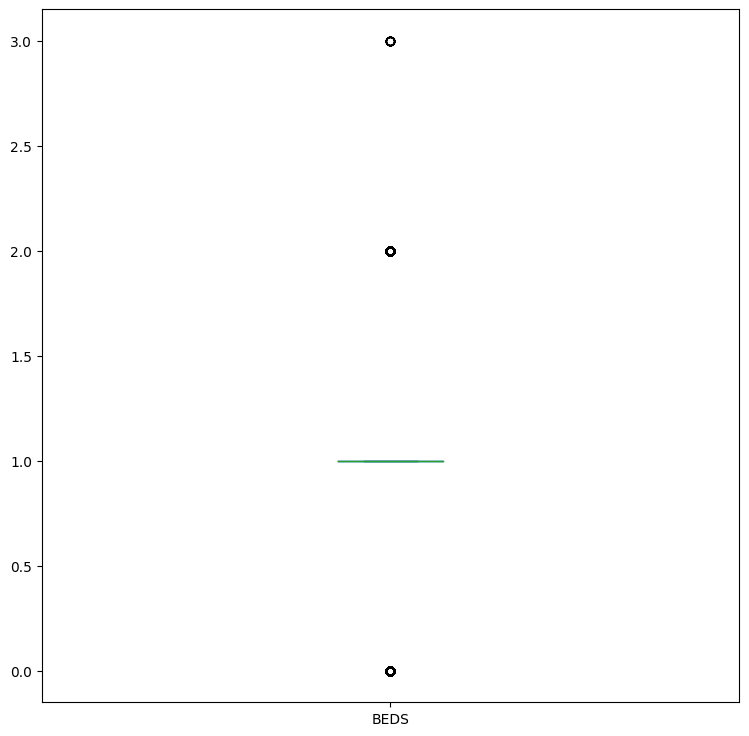

In [365]:
data['BEDS'].plot(kind="box", figsize=(9,9))

<Axes: >

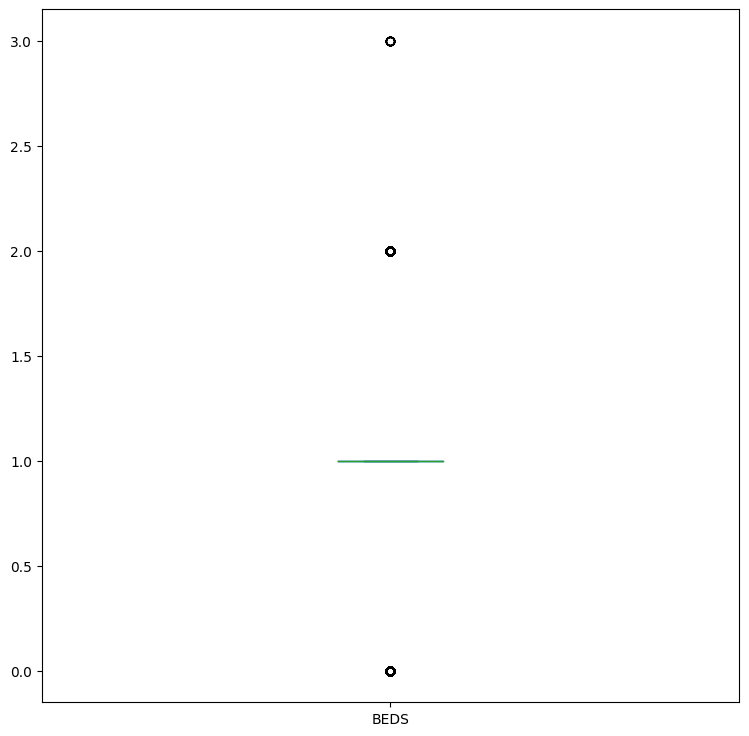

In [366]:
data['BEDS'].plot(kind="box", figsize=(9,9))

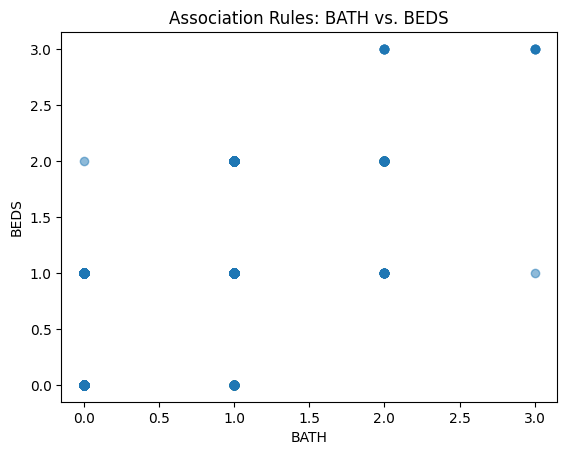

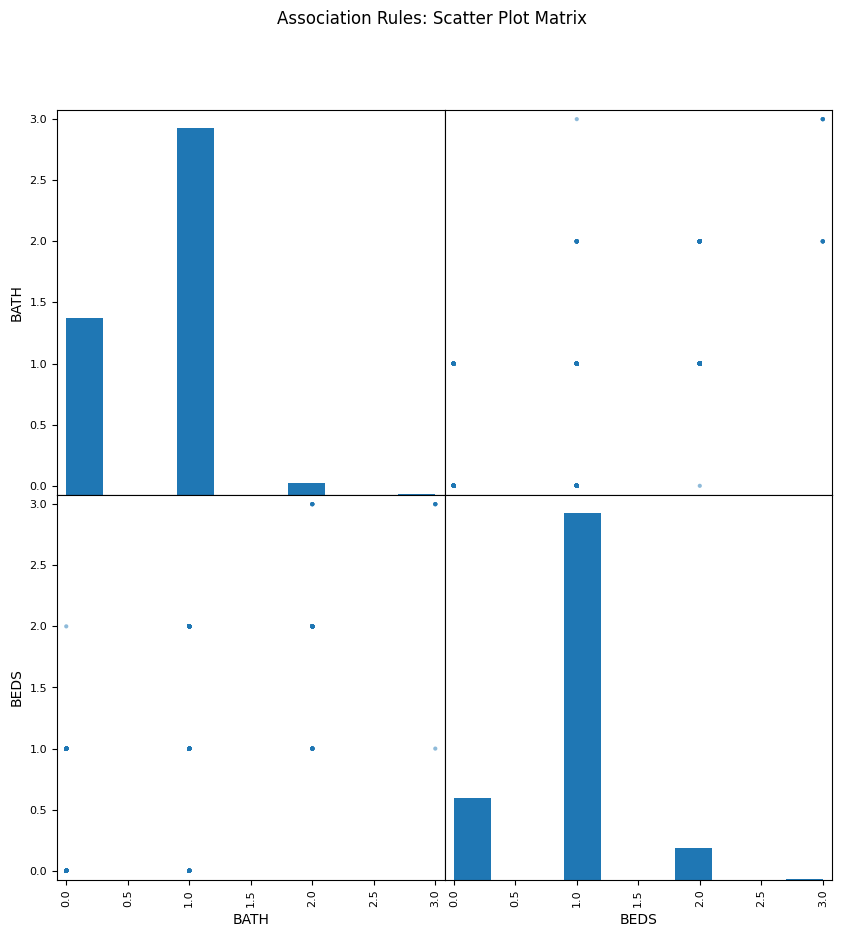

In [367]:


# Scatter plot of bath and beds
plt.scatter(data['BATH'], data['BEDS'], alpha=0.5)
plt.xlabel('BATH')
plt.ylabel('BEDS')
plt.title('Association Rules: BATH vs. BEDS')
plt.show()



# Scatter plot matrix of support, bath and beds
pd.plotting.scatter_matrix(data[['BATH', 'BEDS']], alpha=0.5, figsize=(10, 10))
plt.suptitle('Association Rules: Scatter Plot Matrix')
plt.show()

## Regression Related data mining

### Predictive Analysis

#### Regression model

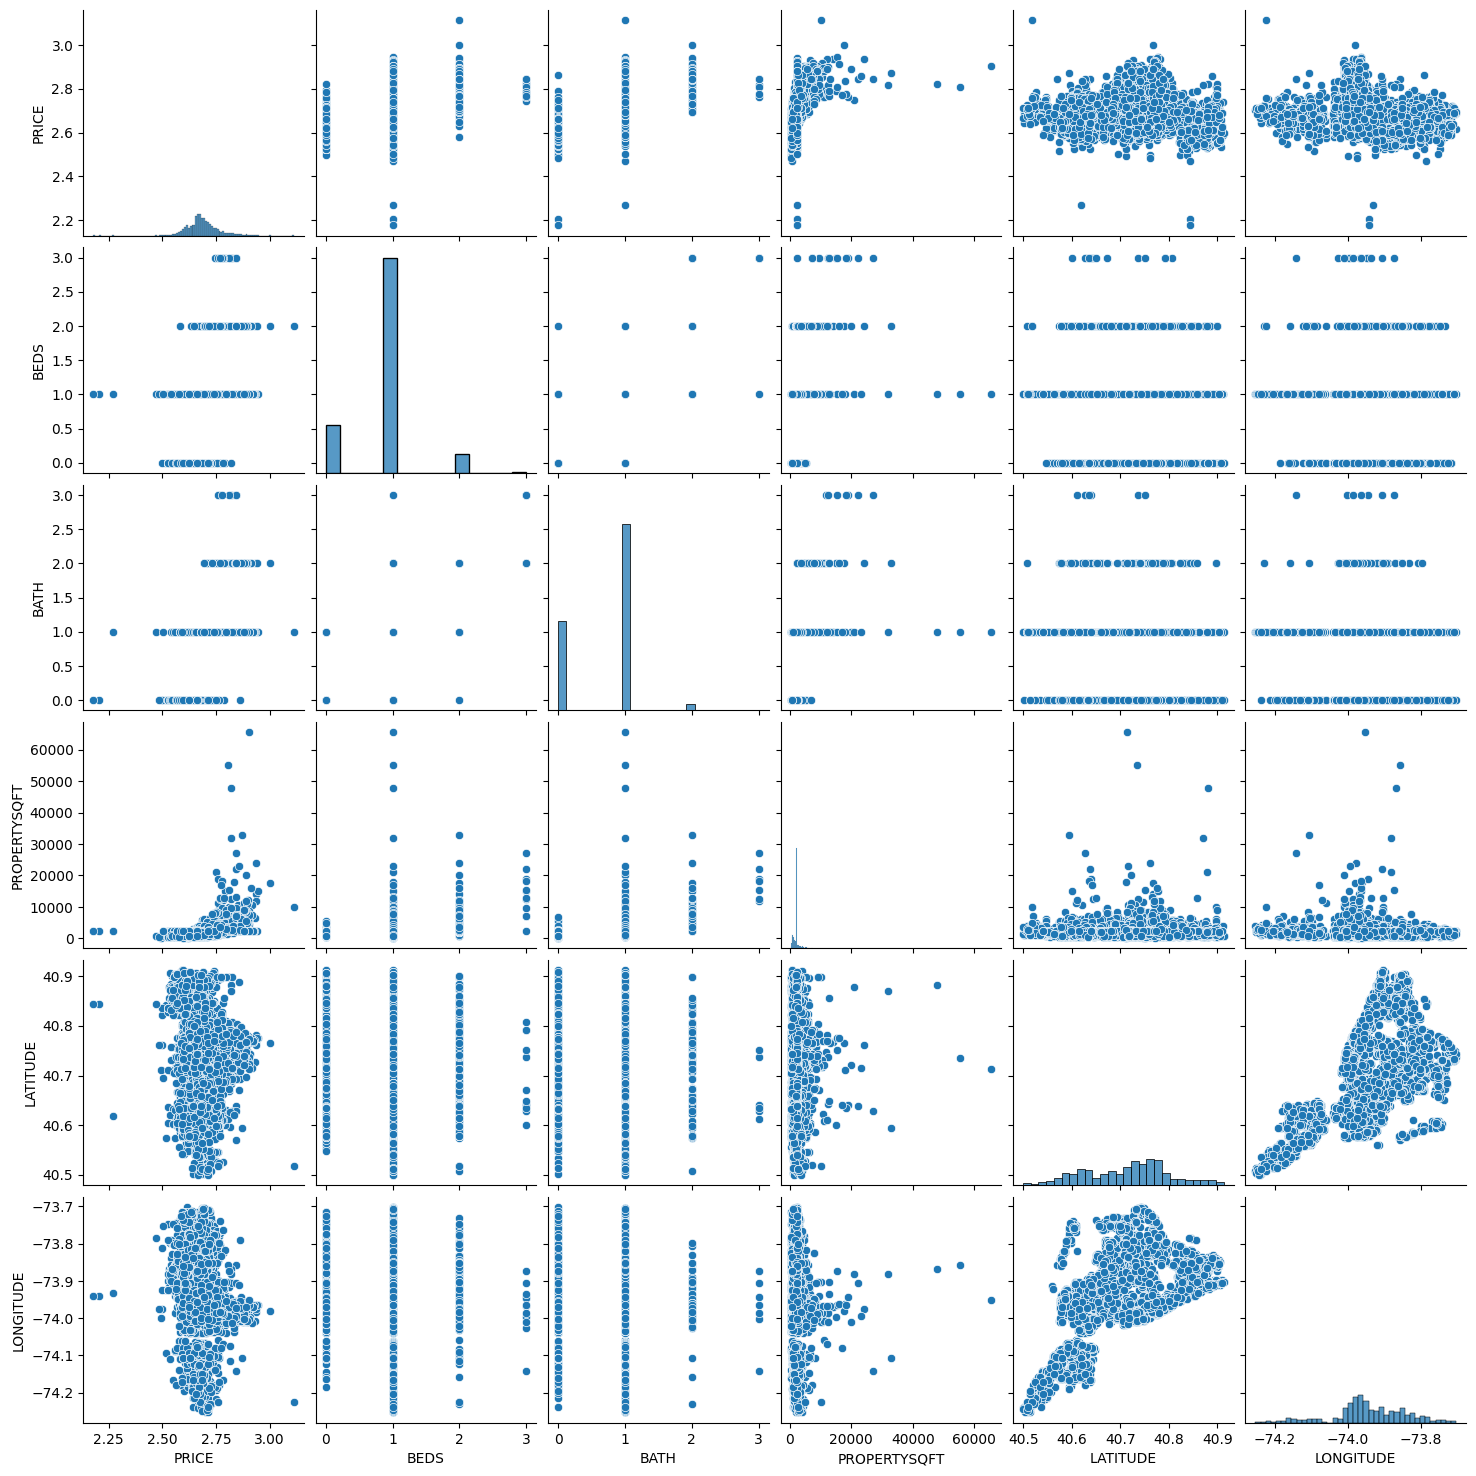

In [368]:
# let's check the distribution of our target column

sns.pairplot(df)

In [369]:
# Take the variables that will be used mostly

x = df.copy()
y = x.pop('PRICE')
df = df[['TYPE','STATE','STREET_NAME','LATITUDE','LONGITUDE','PROPERTYSQFT','BATH','BEDS','PRICE']]
#we change the name of the price because of the same name are used
df.rename(columns={'PRICE': 'PRICE_y'}, inplace=True)
df = df.join(y)

<ipython-input-369-ce2ffffac156>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'PRICE': 'PRICE_y'}, inplace=True)


In [370]:
z = np.abs(stats.zscore(df[['LATITUDE','LONGITUDE','PROPERTYSQFT','BATH','BEDS','PRICE']]))
print(z)

      LATITUDE  LONGITUDE  PROPERTYSQFT      BATH      BEDS     PRICE
0     0.539423   0.324881      0.340677  0.573915  0.199411  1.077551
1     0.597996   0.389143      6.731634  2.534114  2.245714  4.537155
2     1.962052   2.513448      0.071276  0.573915  0.199411  1.283515
3     0.541052   0.326159      0.759014  1.386284  0.199411  2.793122
4     0.607457   0.279186      5.255407  0.573915  2.245714  3.589702
...        ...        ...           ...       ...       ...       ...
4796  0.688691   0.141161      0.002845  1.386284  1.846893  0.408208
4797  0.212082   0.804155      0.002845  1.386284  1.846893  1.347892
4798  0.364185   0.610411      0.002845  1.386284  1.846893  0.341132
4799  0.328721   0.679729      0.667024  1.386284  0.199411  0.409696
4800  1.536398   0.289976      0.625409  1.386284  1.846893  0.968717

[4587 rows x 6 columns]


In [371]:
threshold = 3
print(np.where(z>3))

(array([   1,    1,    4,    4,    7,   69,   69,   76,   98,   98,  138,
        138,  177,  177,  213,  213,  292,  292,  298,  305,  347,  449,
        478,  500,  585,  585,  603,  603,  607,  612,  731,  746,  746,
        804,  890,  909,  942,  945, 1032, 1044, 1059, 1059, 1110, 1110,
       1110, 1147, 1176, 1176, 1176, 1192, 1220, 1257, 1326, 1342, 1363,
       1406, 1418, 1470, 1525, 1670, 1757, 1759, 1916, 1979, 2032, 2032,
       2048, 2063, 2068, 2091, 2184, 2396, 2396, 2469, 2469, 2469, 2550,
       2550, 2550, 2601, 2737, 2820, 2893, 2958, 3002, 3010, 3154, 3154,
       3154, 3211, 3260, 3303, 3432, 3450, 3463, 3463, 3463, 4061, 4061,
       4139, 4169, 4223, 4275, 4421, 4421, 4489]), array([2, 5, 2, 5, 2, 2, 5, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 5, 5, 5, 5,
       1, 5, 2, 5, 2, 3, 5, 5, 4, 2, 4, 2, 2, 2, 2, 1, 2, 5, 2, 4, 2, 3,
       4, 2, 2, 3, 4, 1, 5, 2, 5, 5, 4, 5, 5, 2, 1, 2, 2, 2, 5, 2, 2, 5,
       5, 5, 2, 2, 4, 2, 4, 2, 3, 4, 2, 3, 4, 5, 2, 2, 2, 2, 1, 2, 2, 3,

The first array contains the list of row numbers and the second array respective column numbers, which have Z-score higher than 3. We can get a clean dataset by removing those outliers

In [372]:
new_dataset = df[(z<3).all(axis=1)]
new_dataset.shape
new_dataset.head(5)

,TYPE,STATE,STREET_NAME,LATITUDE,LONGITUDE,PROPERTYSQFT,BATH,BEDS,PRICE_y,PRICE
0,Condo for sale,"New York, NY 10022",East 55th Street,40.761255,-73.974483,1400.000000,1,1,2.614496,2.614496
2,House for sale,"Staten Island, NY 10312",Staten Island,40.541805,-74.196109,2015.000000,1,1,2.600349,2.600349
3,Condo for sale,"Manhattan, NY 10022",New York,40.761398,-73.974613,445.000000,0,1,2.496660,2.496660
5,House for sale,"Brooklyn, NY 11238",Brooklyn,40.674363,-73.958725,4004.000000,1,1,2.670310,2.670310
6,Condo for sale,"New York, NY 10027",Manhattan,40.809448,-73.946777,2184.207862,1,1,2.688500,2.688500


### linear **regression**

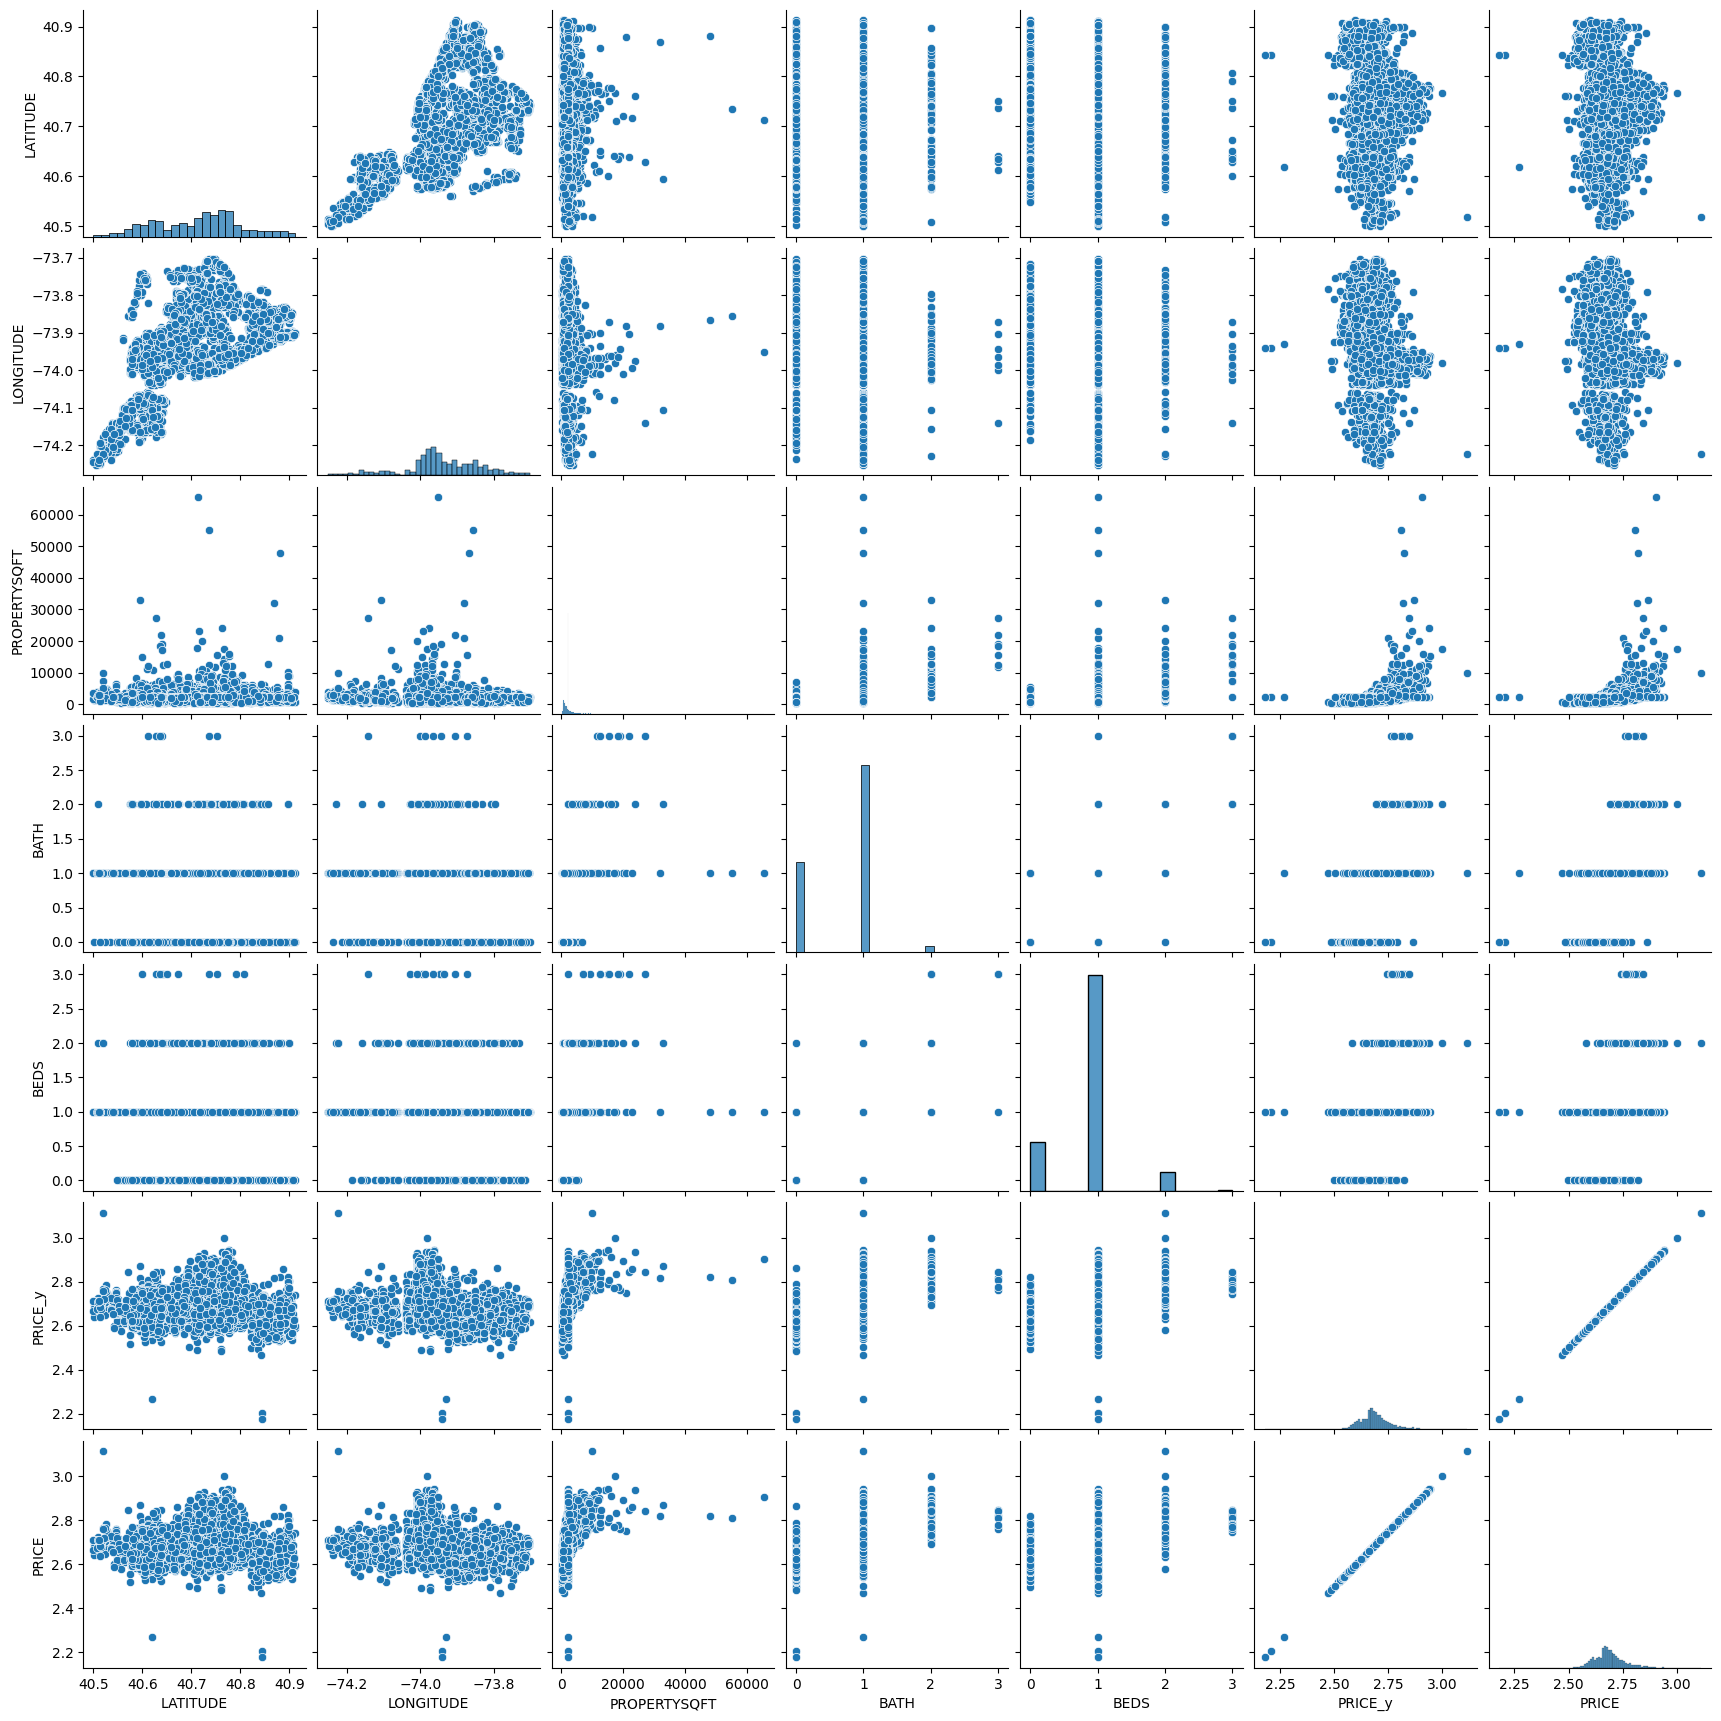

In [373]:
# let's check the distribution of our target column

sns.pairplot(df)

In [374]:
# Take the variables that will be used mostly

x = df.copy()
y = x.pop('PRICE')
df = df[['TYPE','STATE','STREET_NAME','LATITUDE','LONGITUDE','PROPERTYSQFT','BATH','BEDS','PRICE']]
#we change the name of the price because of the same name are used
df.rename(columns={'PRICE': 'PRICE_y'}, inplace=True)
df = df.join(y)

<ipython-input-374-ce2ffffac156>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'PRICE': 'PRICE_y'}, inplace=True)


Removing Outliers with Z-score

In [375]:
z = np.abs(stats.zscore(df[['LATITUDE','LONGITUDE','PROPERTYSQFT','BATH','BEDS','PRICE']]))
print(z)

      LATITUDE  LONGITUDE  PROPERTYSQFT      BATH      BEDS     PRICE
0     0.539423   0.324881      0.340677  0.573915  0.199411  1.077551
1     0.597996   0.389143      6.731634  2.534114  2.245714  4.537155
2     1.962052   2.513448      0.071276  0.573915  0.199411  1.283515
3     0.541052   0.326159      0.759014  1.386284  0.199411  2.793122
4     0.607457   0.279186      5.255407  0.573915  2.245714  3.589702
...        ...        ...           ...       ...       ...       ...
4796  0.688691   0.141161      0.002845  1.386284  1.846893  0.408208
4797  0.212082   0.804155      0.002845  1.386284  1.846893  1.347892
4798  0.364185   0.610411      0.002845  1.386284  1.846893  0.341132
4799  0.328721   0.679729      0.667024  1.386284  0.199411  0.409696
4800  1.536398   0.289976      0.625409  1.386284  1.846893  0.968717

[4587 rows x 6 columns]


In [376]:
threshold = 3
print(np.where(z>3))

(array([   1,    1,    4,    4,    7,   69,   69,   76,   98,   98,  138,
        138,  177,  177,  213,  213,  292,  292,  298,  305,  347,  449,
        478,  500,  585,  585,  603,  603,  607,  612,  731,  746,  746,
        804,  890,  909,  942,  945, 1032, 1044, 1059, 1059, 1110, 1110,
       1110, 1147, 1176, 1176, 1176, 1192, 1220, 1257, 1326, 1342, 1363,
       1406, 1418, 1470, 1525, 1670, 1757, 1759, 1916, 1979, 2032, 2032,
       2048, 2063, 2068, 2091, 2184, 2396, 2396, 2469, 2469, 2469, 2550,
       2550, 2550, 2601, 2737, 2820, 2893, 2958, 3002, 3010, 3154, 3154,
       3154, 3211, 3260, 3303, 3432, 3450, 3463, 3463, 3463, 4061, 4061,
       4139, 4169, 4223, 4275, 4421, 4421, 4489]), array([2, 5, 2, 5, 2, 2, 5, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 5, 5, 5, 5,
       1, 5, 2, 5, 2, 3, 5, 5, 4, 2, 4, 2, 2, 2, 2, 1, 2, 5, 2, 4, 2, 3,
       4, 2, 2, 3, 4, 1, 5, 2, 5, 5, 4, 5, 5, 2, 1, 2, 2, 2, 5, 2, 2, 5,
       5, 5, 2, 2, 4, 2, 4, 2, 3, 4, 2, 3, 4, 5, 2, 2, 2, 2, 1, 2, 2, 3,

The first array contains the list of row numbers and the second array respective column numbers, which have Z-score higher than 3. We can get a clean dataset by removing those outliers

In [377]:
new_dataset = df[(z<3).all(axis=1)]
new_dataset.shape
new_dataset.head(5)

,TYPE,STATE,STREET_NAME,LATITUDE,LONGITUDE,PROPERTYSQFT,BATH,BEDS,PRICE_y,PRICE
0,Condo for sale,"New York, NY 10022",East 55th Street,40.761255,-73.974483,1400.000000,1,1,2.614496,2.614496
2,House for sale,"Staten Island, NY 10312",Staten Island,40.541805,-74.196109,2015.000000,1,1,2.600349,2.600349
3,Condo for sale,"Manhattan, NY 10022",New York,40.761398,-73.974613,445.000000,0,1,2.496660,2.496660
5,House for sale,"Brooklyn, NY 11238",Brooklyn,40.674363,-73.958725,4004.000000,1,1,2.670310,2.670310
6,Condo for sale,"New York, NY 10027",Manhattan,40.809448,-73.946777,2184.207862,1,1,2.688500,2.688500


Training and Testing the dataset

In [378]:
x = new_dataset.copy()
y = x.pop('PRICE_y')

Target Encoding By incorporating target encoding, we account for the influence of type,state and street name on house prices, making our model more accurate and effective in predicting prices.

In [379]:
encoder = MEstimateEncoder(cols=['TYPE','STATE','STREET_NAME'],m=0.5)
encoder.fit(x,y)
x_transformed = encoder.transform(x)
x_transformed

,TYPE,STATE,STREET_NAME,LATITUDE,LONGITUDE,PROPERTYSQFT,BATH,BEDS,PRICE
0,2.702405,2.708146,2.703530,40.761255,-73.974483,1400.000000,1,1,2.614496
2,2.692182,2.691788,2.676427,40.541805,-74.196109,2015.000000,1,1,2.600349
3,2.702405,2.695764,2.791142,40.761398,-73.974613,445.000000,0,1,2.496660
5,2.692182,2.726107,2.712618,40.674363,-73.958725,4004.000000,1,1,2.670310
6,2.702405,2.704896,2.710145,40.809448,-73.946777,2184.207862,1,1,2.688500
...,...,...,...,...,...,...,...,...,...
4796,2.648786,2.744068,2.710145,40.774350,-73.955879,2184.207862,0,0,2.660471
4797,2.648786,2.635323,2.690666,40.732538,-73.860152,2184.207862,0,0,2.595927
4798,2.648786,2.775650,2.791142,40.745882,-74.003398,2184.207862,0,0,2.711940
4799,2.702405,2.656303,2.641118,40.742770,-73.872752,655.000000,0,1,2.660368


In [380]:
# Concatenate the transformed features and the target variable
df_transformed = pd.concat([x_transformed, y], axis=1)

correlation_matrix = df_transformed.corr()

# Print the correlation values
print(correlation_matrix['PRICE_y'])

TYPE            0.473563
STATE           0.608748
STREET_NAME     0.673419
LATITUDE        0.008060
LONGITUDE      -0.188522
PROPERTYSQFT    0.568382
BATH            0.606731
BEDS            0.403105
PRICE           1.000000
PRICE_y         1.000000
Name: PRICE_y, dtype: float64


In [381]:
x_train,x_test,y_train,y_test = train_test_split(x_transformed.values,y.values,test_size=0.2,random_state=0)
df

,TYPE,STATE,STREET_NAME,LATITUDE,LONGITUDE,PROPERTYSQFT,BATH,BEDS,PRICE_y,PRICE
0,Condo for sale,"New York, NY 10022",East 55th Street,40.761255,-73.974483,1400.000000,1,1,2.614496,2.614496
1,Condo for sale,"New York, NY 10019",New York,40.766393,-73.980991,17545.000000,2,2,3.000148,3.000148
2,House for sale,"Staten Island, NY 10312",Staten Island,40.541805,-74.196109,2015.000000,1,1,2.600349,2.600349
3,Condo for sale,"Manhattan, NY 10022",New York,40.761398,-73.974613,445.000000,0,1,2.496660,2.496660
4,Townhouse for sale,"New York, NY 10065",New York,40.767224,-73.969856,14175.000000,1,2,2.935071,2.935071
...,...,...,...,...,...,...,...,...,...,...
4796,Co-op for sale,"Manhattan, NY 10075",Manhattan,40.774350,-73.955879,2184.207862,0,0,2.660471,2.660471
4797,Co-op for sale,"Rego Park, NY 11374",Queens,40.732538,-73.860152,2184.207862,0,0,2.595927,2.595927
4798,Co-op for sale,"New York, NY 10011",New York,40.745882,-74.003398,2184.207862,0,0,2.711940,2.711940
4799,Condo for sale,"Elmhurst, NY 11373",Flushing,40.742770,-73.872752,655.000000,0,1,2.660368,2.660368


In [382]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [383]:
y_pred = lr.predict(x_test)

In [384]:
np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1)

array([[2.8399899 , 2.8399899 ],
       [2.68424189, 2.68424189],
       [2.67120691, 2.67120691],
       ...,
       [2.65120859, 2.65120859],
       [2.86352728, 2.86352728],
       [2.62217915, 2.62217915]])

In [385]:
print("Mean Absolute Error:")
print(mean_absolute_error(y_test,y_pred))
print("\nMean Squared Error:")
print(mean_squared_error(y_test,y_pred))
print("\nR2 Score:")
print(r2_score(y_test,y_pred))

Mean Absolute Error:
2.697029591528429e-15

Mean Squared Error:
8.18727423971896e-30

R2 Score:
1.0


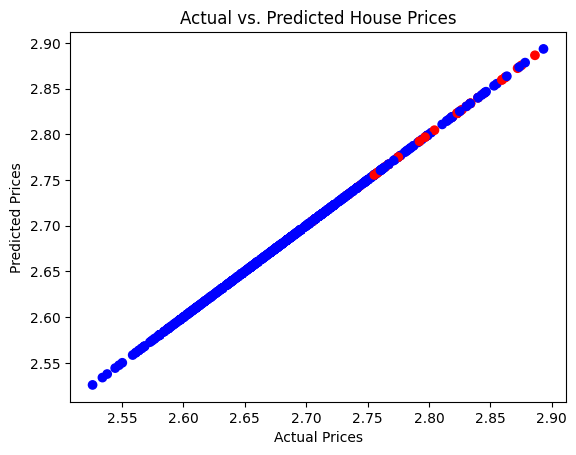

In [386]:
colors = ['blue' if actual < predicted else 'red' for actual, predicted in zip(y_test, y_pred)]

plt.scatter(y_test, y_pred, c=colors)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()

## Classification Related data mining

### Predictive Analysis

In [387]:
# Calculate the skewness of the beds
skewness = data['BEDS'].skew()

# Print the skewness value
print("Skewness of the dataset:", skewness)

# If skewness is positive, apply log transformation to make the data more symmetric
if skewness > 0:
    transformed_data = np.log1p(data['BEDS'])  # Log transformation
    # Replace the skewed column with the transformed data
    data['BEDS'] = transformed_data

# Print the updated skewness after transformation
print("Skewness after transformation:", data['BEDS'].skew())

Skewness of the dataset: -0.0719524595068405
Skewness after transformation: -0.0719524595068405


In [390]:
np.random.seed(0)
num_samples = len(data)
print(data['PRICE'].min())

2.177253590129342


In [391]:
house_prices = np.random.randint(min(data['PRICE']), max(data['PRICE']), num_samples)
num_bedrooms = np.random.randint(min(data['BEDS']), max(data['BEDS']), num_samples)
num_bathrooms = np.random.randint(min(data['BATH']), max(data['BATH']), num_samples)


labels = np.random.randint(0, 2, num_samples)  # Binary labels: 0 or 1

In [392]:

# Creating feature matrix
X = np.column_stack((data['PRICE'], data['BEDS'], data['BATH']))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [393]:
# Training a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [394]:
y_pred = model.predict(X_test_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49673202614379086


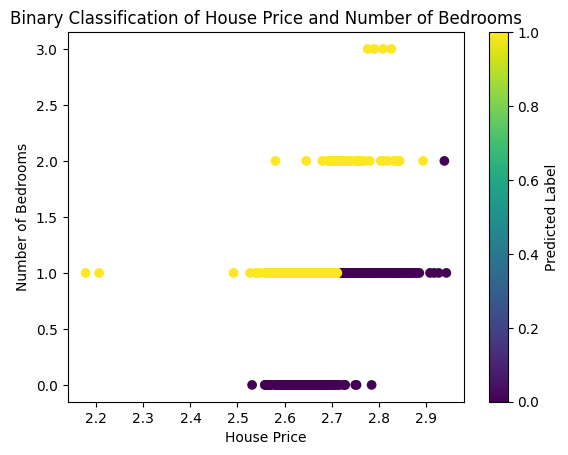

In [395]:
# Visualizing the data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('House Price')
plt.ylabel('Number of Bedrooms')
plt.title('Binary Classification of House Price and Number of Bedrooms')
plt.colorbar(label='Predicted Label')
plt.show()

In [396]:
# Predicting whether the next house price is in the acceptable price range or not
new_house_price = 1.30
new_num_bedrooms = 1
new_num_bathrooms = 2

new_data = scaler.transform([[new_house_price, new_num_bedrooms, new_num_bathrooms]])
prediction = model.predict(new_data)
if prediction[0] == 1:
    print("The next house price is in the acceptable price range.")
else:
    print("The next house price is not in the acceptable price range.")

The next house price is in the acceptable price range.


## Clustering Related data mining

***Here it performe location based clustering using given logitudes and latitudes***

### Descriptive Analysis

**Five-Number Summery of Latitude**

In [397]:
data['LATITUDE'].describe()

count    4587.000000
mean       40.713932
std         0.087738
min        40.499546
25%        40.638588
50%        40.726667
75%        40.771913
max        40.912729
Name: LATITUDE, dtype: float64

**Five-Number Summery of Longitude**

In [398]:
data['LONGITUDE'].describe()

count    4587.000000
mean      -73.941584
std         0.101276
min       -74.253033
25%       -73.987420
50%       -73.949116
75%       -73.869455
max       -73.702450
Name: LONGITUDE, dtype: float64

**Scatter Plot**

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

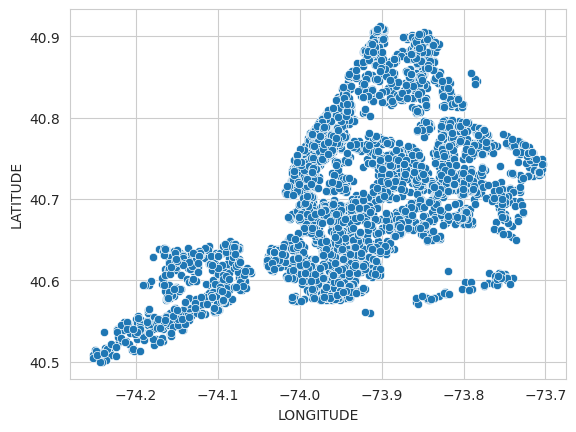

In [399]:
sns.set_style('whitegrid')
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE')

**Histogram for Latitude**

<Axes: xlabel='LATITUDE', ylabel='Count'>

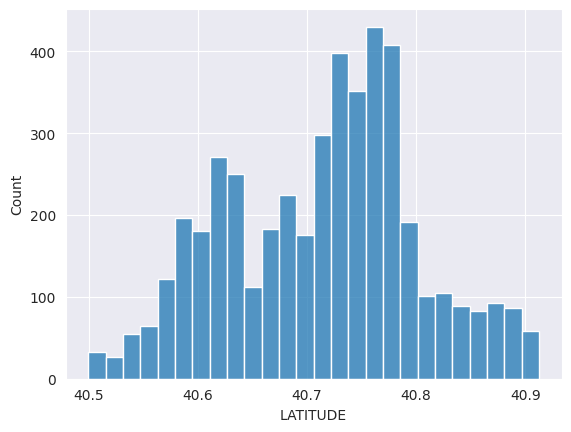

In [400]:
sns.set_style('darkgrid')
sns.histplot(data=df, x='LATITUDE')

**Histogram for Logitude**

<Axes: xlabel='LONGITUDE', ylabel='Count'>

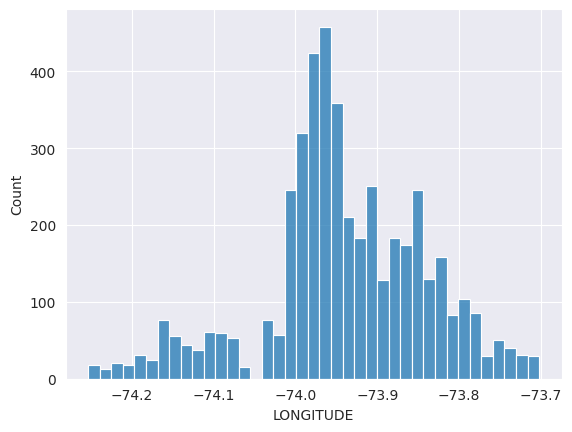

In [401]:
sns.set_style('darkgrid')
sns.histplot(data=df, x='LONGITUDE')


**LinePlot for both Longitude and Latitude**

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

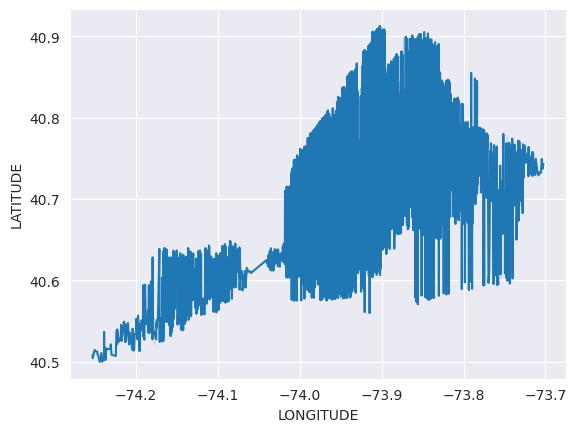

In [402]:
sns.lineplot(x="LONGITUDE", y="LATITUDE", data=df)

### Predictive Analysis

***Clustering does not discuss about any Predictive Analysis unless we dont predict anything using clusters.***

### **DATA CLUSTERING**

**View data**

In [403]:
x = df[["LATITUDE", "LONGITUDE"]]
x.head()

,LATITUDE,LONGITUDE
0,40.761255,-73.974483
1,40.766393,-73.980991
2,40.541805,-74.196109
3,40.761398,-73.974613
4,40.767224,-73.969856


**find the optimal number of clusters by iterating from 1 to 10**

In [404]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    y_kmeans = model.fit_predict(x)
    wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**Draw Elow method**

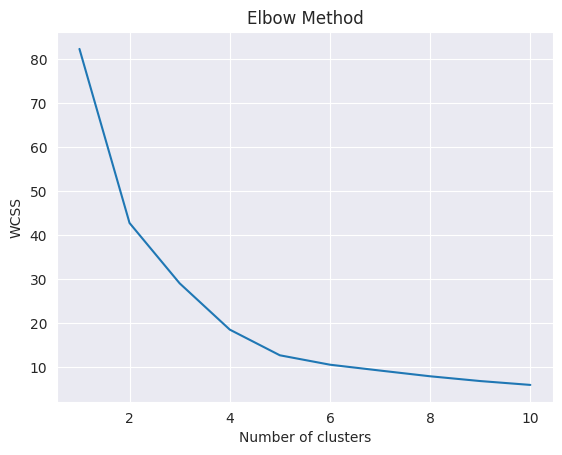

In [405]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

**Clustering**

In [406]:
# considered 5 clusters

model = KMeans(n_clusters=5)
y_kmeans = model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [407]:
df['y'] = y_kmeans

**Plot the data with clusters**

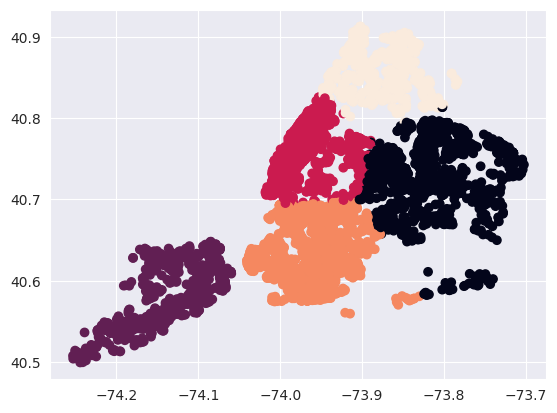

In [408]:
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['y'])

In [409]:
df = df[:2000]

cluster1 = df[['LATITUDE', "LONGITUDE"]][df['y'] == 0].values.tolist()
cluster2 = df[['LATITUDE', "LONGITUDE"]][df['y'] == 1].values.tolist()
cluster3 = df[['LATITUDE', "LONGITUDE"]][df['y'] == 2].values.tolist()
cluster4 = df[['LATITUDE', "LONGITUDE"]][df['y'] == 3].values.tolist()
cluster5 = df[['LATITUDE', "LONGITUDE"]][df['y'] == 4].values.tolist()

**Get the Map**

In [410]:
map = folium.Map(location=[40.4995462, -74.2530332], zoom_start=10,tiles = "openstreetmap")
map

**Clustered Data in the Map**

In [411]:
for i in cluster1:
    folium.CircleMarker(i, radius=2,color='blue',fill_color='lightblue').add_to(map)

for i in cluster2:
    folium.CircleMarker(i, radius=2,color='red',fill_color='lightred').add_to(map)

for i in cluster3:
    folium.CircleMarker(i, radius=2,color='green',fill_color='lightgreen').add_to(map)

for i in cluster4:
    folium.CircleMarker(i, radius=2,color='yellow',fill_color='lightyellow').add_to(map)

for i in cluster5:
    folium.CircleMarker(i, radius=2,color='orange',fill_color='lightorange').add_to(map)

In [412]:
map

***snippet generates a synthetic dataset X_blobs containing 1000 data points, organized into 5 clusters with two features each, using the make_blobs function from scikit-learn.***

In [413]:
# Pre-defining different colors and a long list of it so it can be assigned to different clusters later.
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1',
        '#000075', '#808080']*10

In [414]:
X_blobs, _ = make_blobs(n_samples = 1000, centers = 5, n_features = 2, random_state = 4, cluster_std = 0.5)

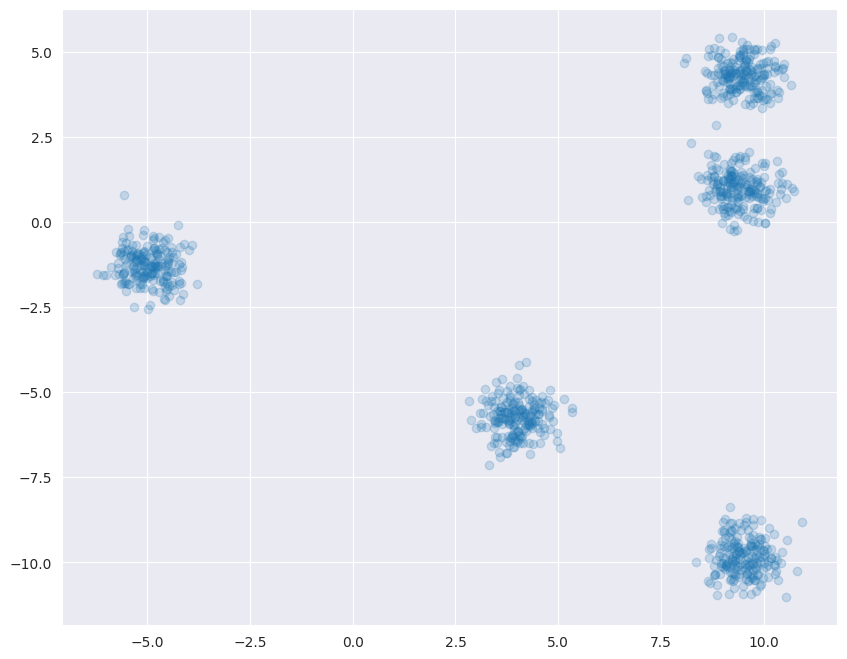

In [415]:
plt.figure(figsize = [10,8])
plt.scatter(X_blobs[:,0], X_blobs[:,1], alpha = 0.2)